# Explore here

In [16]:
import os
import pandas as pd
import joblib
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# We will import the clean data obtained from the decision tree exercise
test_data = pd.read_csv(r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\DECISIONTREE\DecisionTreeProject\data\processed\clean_test.csv")
train_data = pd.read_csv(r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\DECISIONTREE\DecisionTreeProject\data\processed\clean_test.csv")
tree_model = joblib.load(r'D:/01A-TRABAJO/PYTHON/DATASCIENCE/EJERCICIOS/DECISIONTREE/DecisionTreeProject/models/TreeClasifierModel.sav')

From the previous exercise we got the following accuracy and predictive results:
Accuracy Score : 0.7532467532467533

In [3]:
X_train = train_data.drop('Outcome', axis=1)
y_train = train_data['Outcome']
X_test = test_data.drop('Outcome', axis=1)
y_test = test_data['Outcome']

In [4]:
randomforest_model = RandomForestClassifier(n_estimators=100, random_state=42)
randomforest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Make predictions using both models
tree_predictions = tree_model.predict(X_test)
rf_predictions = randomforest_model.predict(X_test)

# Compare the results
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("-"*40)
print("Decision Tree Classification Report:")
print(classification_report(y_test, tree_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Decision Tree Accuracy: 0.7532467532467533
Random Forest Accuracy: 1.0
----------------------------------------
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        55

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



We are concerned there was overfitting with the Random Forest Accuracy which is perfect.

In [6]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [7]:
rf_scores = cross_val_score(randomforest_model, X, y, cv=10)

print("Random Forest CV Scores:", rf_scores)
print("Random Forest CV Mean:", np.mean(rf_scores))

Random Forest CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Random Forest CV Mean: 1.0


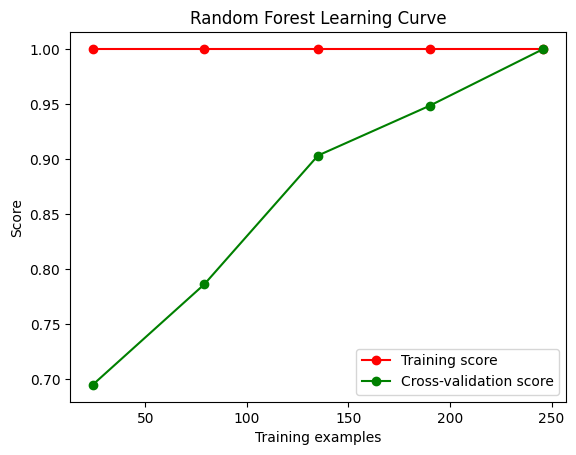

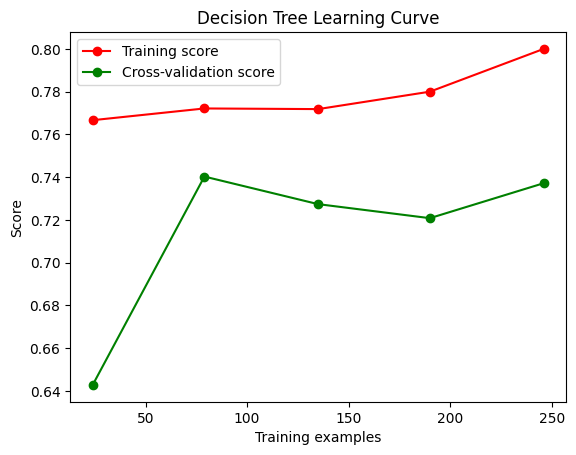

In [8]:
def plot_learning_curve(estimator, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(randomforest_model, "Random Forest Learning Curve")
plot_learning_curve(tree_model, "Decision Tree Learning Curve")


In [9]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = randomforest_model, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

print("Best parameters found:", rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\RANDOMFOREST\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}


In [11]:
best_rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=50,
    bootstrap=True,
    random_state=42
)

best_rf.fit(X_train, y_train)


y_pred = best_rf.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        55

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



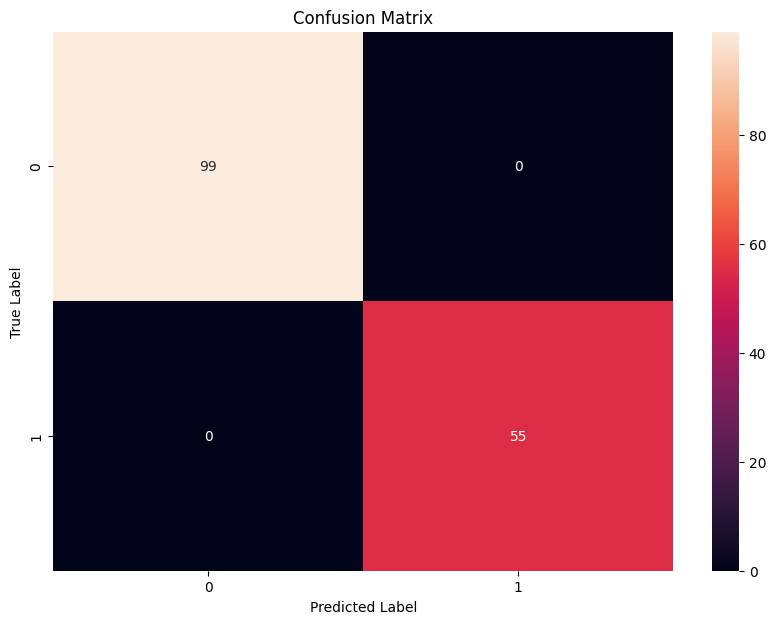

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

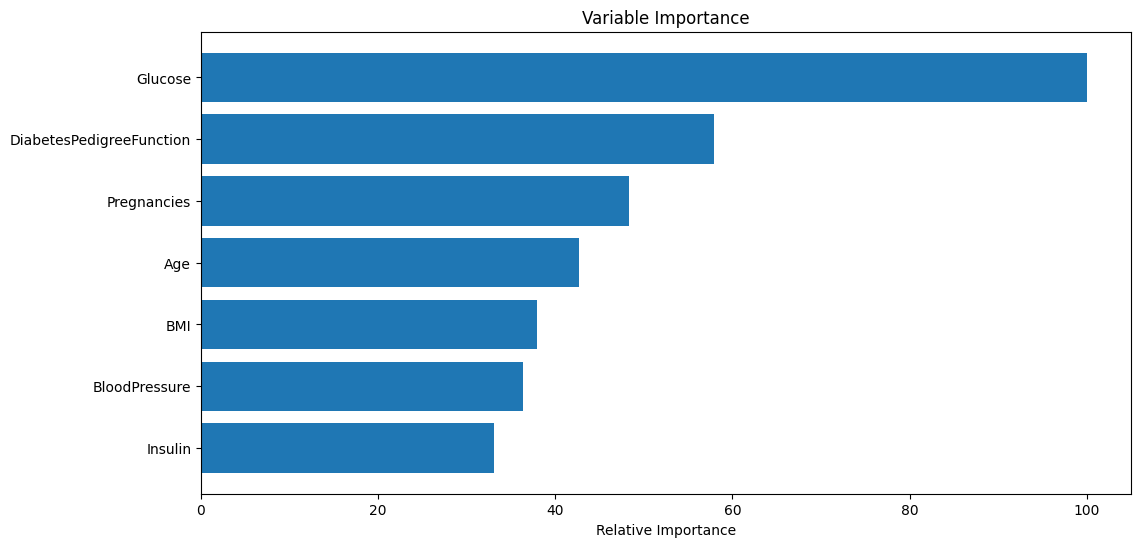

In [15]:
feature_importance = best_rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

We confirmed with the confusion matrix, that even when performing very well on the accuracy score, it is still performing very well at determining the correct result. 

In [18]:
# We now save our model.
model_dir = r'D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\RANDOMFOREST\RandomForest\models'
model_path = os.path.join(model_dir, 'RandomForestModel.joblib')
joblib.dump(best_rf, model_path)
print(f"Model saved to {model_path}")


Model saved to D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\RANDOMFOREST\RandomForest\models\RandomForestModel.joblib
